### PROCESS IMAGES ATTEMPT 2

In [45]:
import cv2
from image_utils import get_pixels, make_image
from PIL import Image
import numpy as np
import os
# from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist, squareform
import pandas as pd
from sklearn.cluster import KMeans
import lap
import matplotlib.pyplot as plt

In [ ]:
# !pip install lap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 193.2 kB/s eta 0:00:00a 0:00:01


In [ ]:
# !wget -q https://github.com/PSAM-5020-2025S-A/5020-utils/raw/main/src/data_utils.py

In [9]:
from data_utils import PCA, StandardScaler

In [10]:
from utils import save_to_json, cluster_pca_images, is_valid_mask, get_images_pca, get_display_normalized_image, normalize_image_to_pixel_array, extract_hu_moments, sort_images

In [11]:
from grid_utils import get_grid_xy, plot_moves

#### Normalize Images

In [12]:
folder_path = '../public/data/images'
all_files = (os.listdir(folder_path))
image_paths = [os.path.join(folder_path, f) for f in all_files if f.lower().endswith((".png"))]

In [13]:
image_paths[0]

'../public/data/images/9305mask.png'

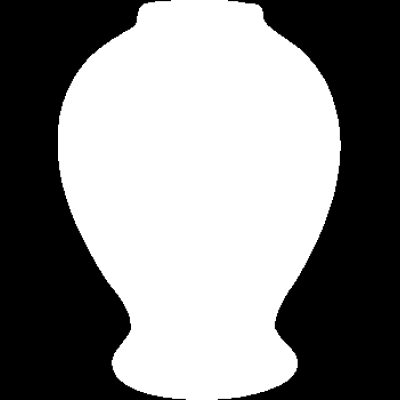

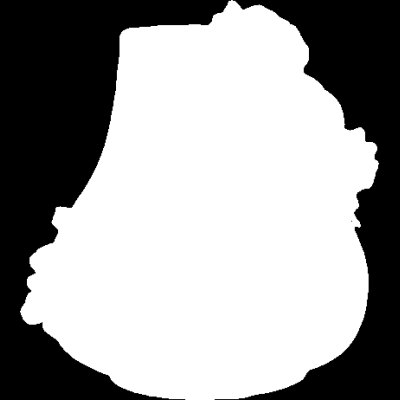

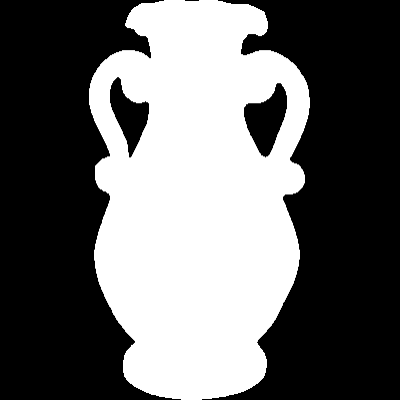

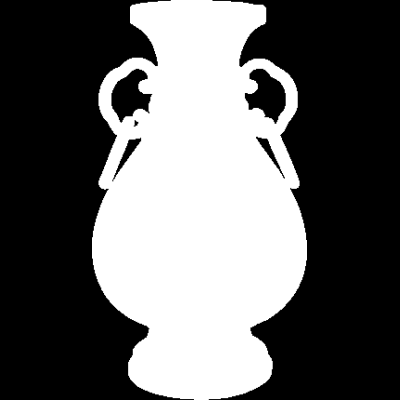

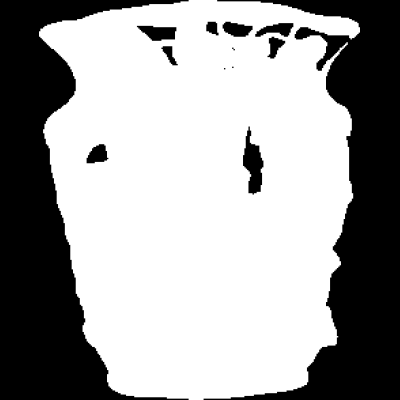

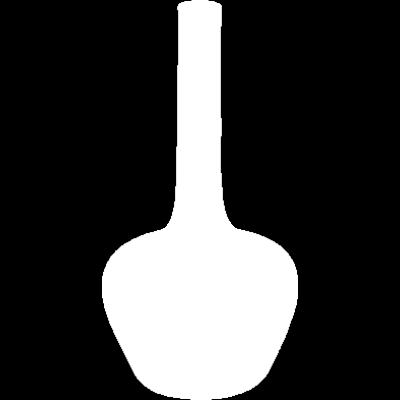

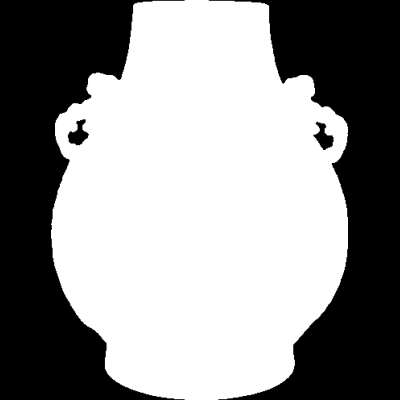

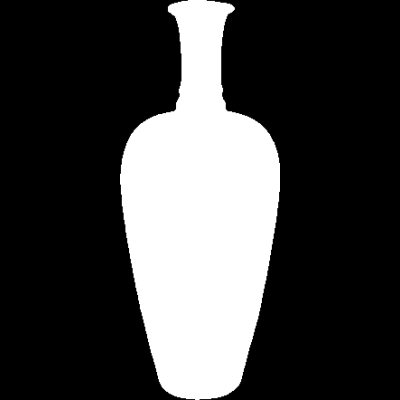

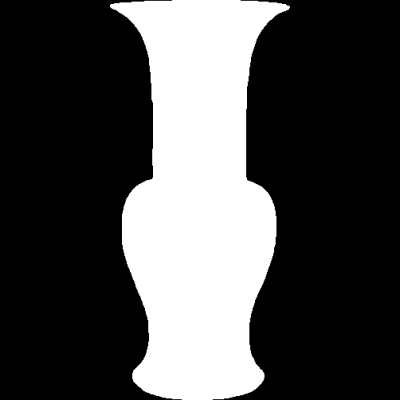

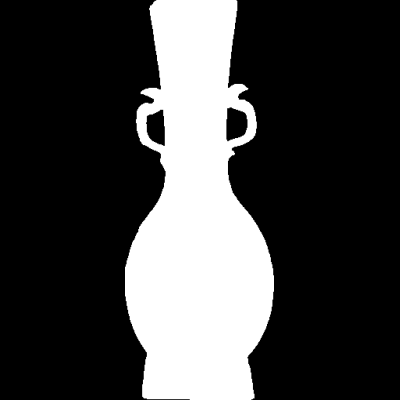

In [14]:
for path in image_paths[:10]:
    img = get_display_normalized_image(path)
    display(img)

In [23]:
pca_df, valid_image_paths = get_images_pca()

In [22]:
pca_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-13687.569789,-10879.863359,-9859.333290,3955.357229,-600.806362,708.967330,-5934.186064,7684.672840,479.221975,-5577.355367,...,2949.945330,-2877.381727,635.033814,651.267043,-536.340808,-1129.891309,-924.647613,-1351.631055,687.131156,2013.246989
1,-12018.413850,-2372.369259,-473.062892,-9171.305604,2210.890682,-5765.006241,-4652.425383,-819.862767,1022.272041,1273.115949,...,-764.332930,623.239323,368.260315,-551.723849,-4185.540293,68.824592,649.326246,1292.739363,-456.189498,724.931940
2,-15838.187543,13901.666492,50.416779,-2844.805969,11829.158067,2676.346497,-2022.290555,247.638720,1289.873340,7479.288599,...,-2037.640528,1336.570004,424.950796,-1255.113752,-1306.098883,477.144687,1487.520295,-2029.715710,264.002952,605.921991
3,-15506.137829,-13281.444101,-12442.594865,9614.731497,-8444.407449,3504.530975,2727.739236,4726.680722,6022.770601,-5676.285934,...,-204.312848,585.028246,1585.068320,-1307.114543,-1335.882649,-1219.464956,1408.186070,-740.345626,757.565977,492.310750
4,-6612.218992,-18874.942851,-5330.061037,-3242.836081,-5116.687425,5273.656663,-3996.349603,2827.666973,-1036.702189,-1711.384219,...,898.528071,837.222141,567.364485,307.228898,960.619814,-249.089780,591.955775,-104.401198,345.423004,456.097870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,30425.008016,-2624.991589,-9103.170127,-2406.163736,9612.626158,-748.977732,3682.261205,-11742.420992,9290.327838,-7516.584263,...,-497.111991,-1543.750132,1413.951910,214.478852,-64.554661,586.461528,-715.812834,1174.770025,-7.832910,1573.635215
711,28112.362103,-6232.168523,-7807.176251,-2517.580043,10807.584199,-1120.630297,6815.304931,-12063.922067,9375.257573,-5277.529139,...,-1811.763490,-1655.387737,-1040.800230,715.001630,-578.453787,-862.415530,-666.302044,803.042296,-389.159681,1176.762902
712,-17537.426291,-5842.527374,-6695.679131,-8092.526265,-5814.880735,-1267.931370,-4774.924911,-3438.327511,-2677.575403,-5281.489164,...,658.890718,-235.235532,-1238.308364,-187.789949,-1454.676672,721.835488,-64.976302,188.919839,79.395485,-1526.592172
713,-18337.210916,-4932.052979,-7270.906645,-7985.292117,-5594.112357,-1354.616931,-4369.936622,-3952.639134,-2747.500445,-5065.081056,...,429.059383,-757.304338,-1334.919890,-670.694930,-644.709464,873.245562,316.670246,571.993657,742.201938,-1438.165743


In [17]:
valid_image_paths

['../public/data/images/1029mask.png',
 '../public/data/images/13456mask.png',
 '../public/data/images/13528mask.png',
 '../public/data/images/14273mask.png',
 '../public/data/images/14318mask.png',
 '../public/data/images/14319mask.png',
 '../public/data/images/14344mask.png',
 '../public/data/images/14495mask.png',
 '../public/data/images/14498mask.png',
 '../public/data/images/14499mask.png',
 '../public/data/images/14503mask.png',
 '../public/data/images/14510mask.png',
 '../public/data/images/1524mask.png',
 '../public/data/images/15303mask.png',
 '../public/data/images/1531mask.png',
 '../public/data/images/15547mask.png',
 '../public/data/images/15595mask.png',
 '../public/data/images/15980mask.png',
 '../public/data/images/15982mask.png',
 '../public/data/images/16001mask.png',
 '../public/data/images/16544mask.png',
 '../public/data/images/16579mask.png',
 '../public/data/images/16755mask.png',
 '../public/data/images/17495mask.png',
 '../public/data/images/17731mask.png',
 '.

#### Arrange By Cluster

In [16]:
clustered_results = cluster_pca_images(pca_df, valid_image_paths, n_clusters=10)

In [17]:
cluster_list = [filename for filenames in clustered_results.values() for filename in filenames]

In [18]:
cluster_list

['1029mask.png',
 '14273mask.png',
 '15982mask.png',
 '19869mask.png',
 '199500mask.png',
 '20148mask.png',
 '204075mask.png',
 '204620mask.png',
 '205426mask.png',
 '206742mask.png',
 '208152mask.png',
 '21355mask.png',
 '238867mask.png',
 '37407mask.png',
 '40633mask.png',
 '40744mask.png',
 '41919mask.png',
 '42126mask.png',
 '42205mask.png',
 '42206mask.png',
 '42250mask.png',
 '42251mask.png',
 '43264mask.png',
 '460766mask.png',
 '461266mask.png',
 '46915mask.png',
 '50349mask.png',
 '52937mask.png',
 '52938mask.png',
 '623442mask.png',
 '623467mask.png',
 '623475mask.png',
 '623476mask.png',
 '658683mask.png',
 '658687mask.png',
 '667481mask.png',
 '702895mask.png',
 '771052mask.png',
 '9196mask.png',
 '9203mask.png',
 '9204mask.png',
 '9209mask.png',
 '9211mask.png',
 '9212mask.png',
 '9234mask.png',
 '9240mask.png',
 '9272mask.png',
 '9364mask.png',
 '9394mask.png',
 '9480mask.png',
 '9481mask.png',
 '9488mask.png',
 '9489mask.png',
 '9500mask.png',
 '9501mask.png',
 '9506mask

In [19]:
save_to_json(cluster_list)

In [59]:
clustered_results_2 = cluster_pca_images(pca_df, valid_image_paths, n_clusters=30)
save_to_json(clustered_results_2,'../public/data/sortedImages_clusters.json')

#### Arrange by PCA Grid

In [60]:
pca_array = pca_df.to_numpy()
grid = get_grid_xy(pca_array)


In [61]:
grid

array([[0.11538462, 0.07692308],
       [0.34615385, 0.46153846],
       [0.19230769, 0.88461538],
       ...,
       [0.11538462, 0.23076923],
       [0.11538462, 0.26923077],
       [0.11538462, 0.30769231]])

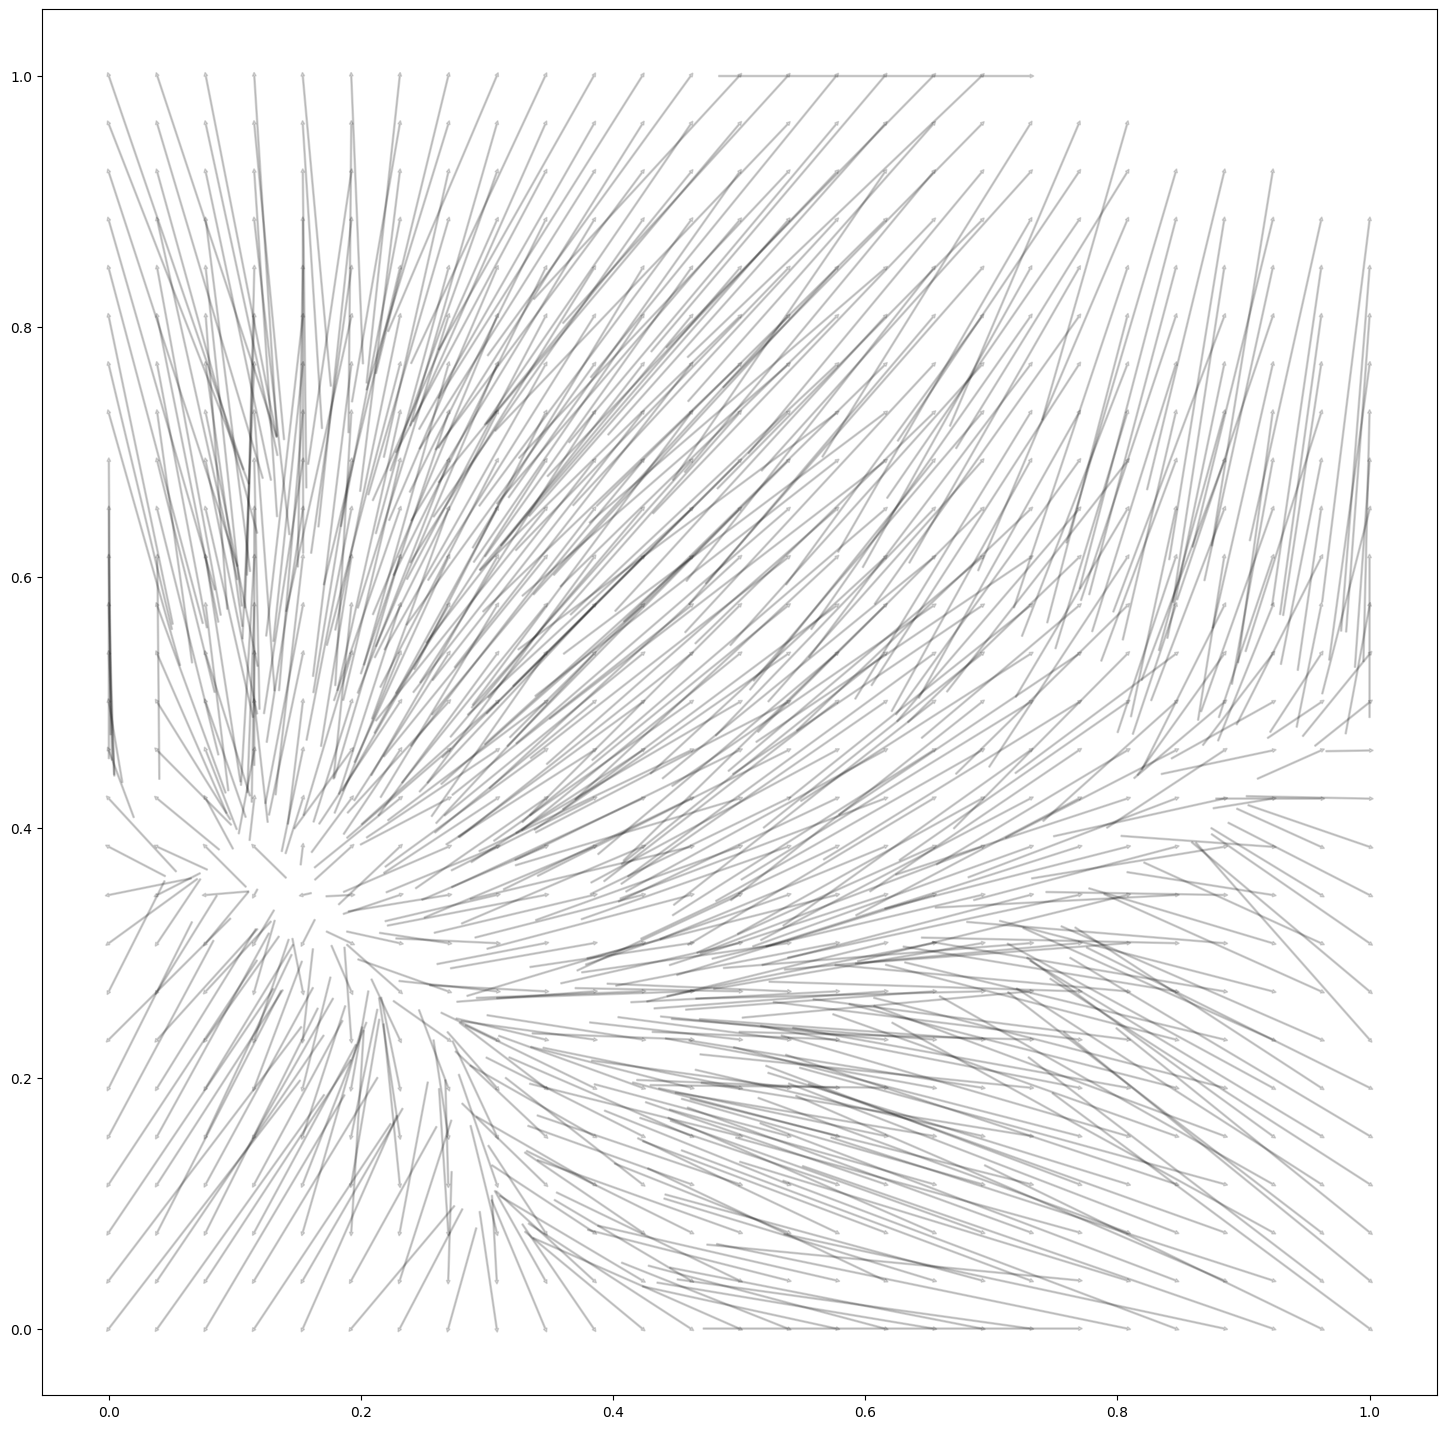

In [62]:
plot_moves(pca_array, grid)